<a href="https://colab.research.google.com/github/louise-queiroz/bootcamp-data-analytics/blob/main/ProbEAmostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Final
Aluna: Louise Queiroz da Silva Bezerra
Squad: Ada Lovelace

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

df = pd.read_csv('populacao_brasileira.csv')
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
df.describe()

,Unnamed: 0,idade,renda
count,1000.000000,1000.000000,1000.000000
mean,499.500000,40.986000,3082.537180
std,288.819436,13.497852,996.572239
min,0.000000,18.000000,103.740000
25%,249.750000,29.000000,2425.815000
50%,499.500000,42.000000,3076.415000
75%,749.250000,52.000000,3714.487500
max,999.000000,64.000000,5632.380000


1) Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado.


In [ ]:
nao_fluentes = df[df['nível de proficiência em inglês'] != 'Avançado'].shape[0]
total_pessoas = df.shape[0]
prob_complementar = 1 - (nao_fluentes / total_pessoas) # 1 - P(A)

print("Probabilidade complementar de escolher uma pessoa não fluente em inglês:", prob_complementar)

Probabilidade complementar de escolher uma pessoa não fluente em inglês: 0.344


2) Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
alagoas_para = df[(df['estado'] == 'AL') | (df['estado'] == 'PA')]
renda_superior = alagoas_para[alagoas_para['renda'] > 5000].shape[0]

total_alagoas_para = alagoas_para.shape[0]
probabilidade = renda_superior / total_alagoas_para

print("Probabilidade de ter renda superior a 5 mil reais, dado que a pessoa é de Alagoas ou do Pará:", probabilidade)


Probabilidade de ter renda superior a 5 mil reais, dado que a pessoa é de Alagoas ou do Pará: 0.05063291139240506


3) Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
amazonas_superior = df[(df['estado'] == 'AM') & (df['escolaridade'] == 'Superior')].shape[0]
total_amazonas = df[df['estado'] == 'AM'].shape[0]
probabilidade_amazonas_superior = amazonas_superior / total_amazonas

print("Probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas:", probabilidade_amazonas_superior)

amazonas_df = df[df['estado'] == 'AM']
quinta_pessoa_amazonense = amazonas_df.iloc[4]
probabilidade_superior_amazonas = amazonas_superior / amazonas_df.shape[0] if amazonas_df.shape[0] != 0 else 0
print("Probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo:", probabilidade_superior_amazonas)



Probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas: 0.23684210526315788
Probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo: 0.23684210526315788


4) Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?

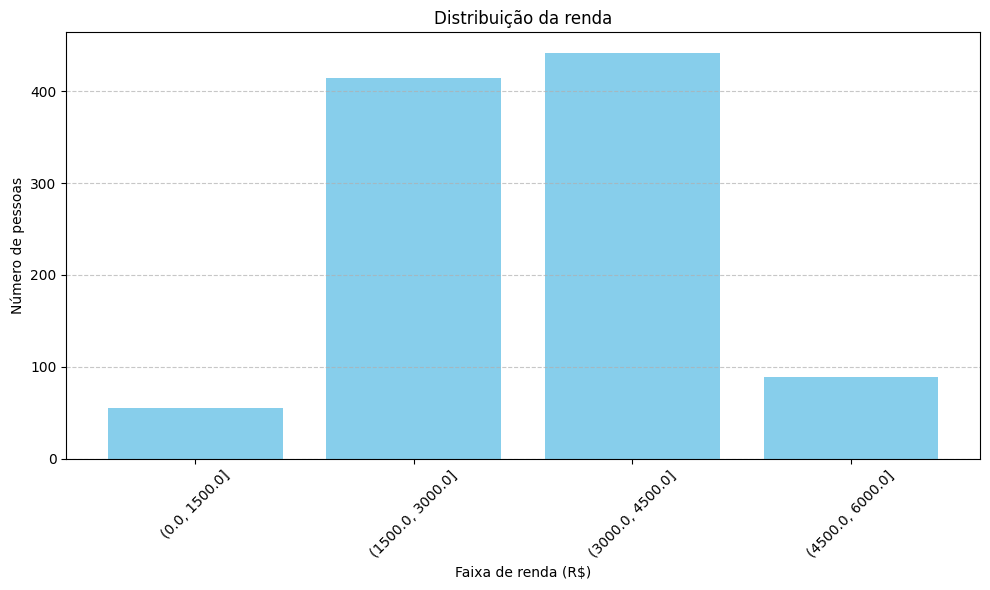

Função densidade de probabilidade:
(0.0, 1500.0]       0.000037
(1500.0, 3000.0]    0.000276
(3000.0, 4500.0]    0.000295
(4500.0, 6000.0]    0.000059
Name: renda, dtype: float64


In [ ]:
faixas_renda = np.arange(0, df['renda'].max() + 1500, 1500)
contagem_por_faixa = pd.cut(df['renda'], bins=faixas_renda).value_counts().sort_index()
proporcao_por_faixa = contagem_por_faixa / len(df)

plt.figure(figsize=(10, 6))
plt.bar(contagem_por_faixa.index.astype(str), contagem_por_faixa, color='skyblue')
plt.title('Distribuição da renda')
plt.xlabel('Faixa de renda (R$)')
plt.ylabel('Número de pessoas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

densidade_probabilidade = proporcao_por_faixa / 1500
print("Função densidade de probabilidade:")
print(densidade_probabilidade)



5) Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.


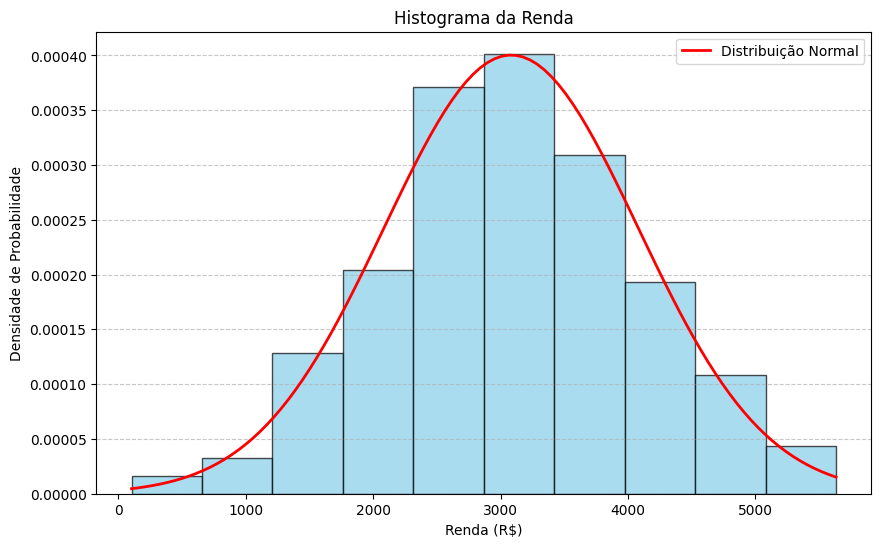

Média da renda: 3082.5371800000003
Variância da renda: 993156.2281676152


In [ ]:
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()

plt.figure(figsize=(10, 6))
plt.hist(df['renda'], bins=10, color='skyblue', alpha=0.7, edgecolor='black', density=True)
plt.title('Histograma da Renda')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de Probabilidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)


x = np.linspace(df['renda'].min(), df['renda'].max(), 100)
pdf_normal = norm.pdf(x, loc=media_renda, scale=np.sqrt(variancia_renda))
plt.plot(x, pdf_normal, 'r-', linewidth=2, label='Distribuição Normal')

plt.legend()
plt.show()

print("Média da renda:", media_renda)
print("Variância da renda:", variancia_renda)

6) Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?


In [ ]:
from scipy.stats import binom

num_pos_grad = df[df['escolaridade'] == 'Superior'].shape[0]
total_pessoas = df.shape[0]
probabilidade_pos_grad = num_pos_grad / total_pessoas

n = 1000000
k = 243000
p = probabilidade_pos_grad
probabilidade = binom.pmf(k, n, p)

print("Probabilidade de encontrar 243 mil pessoas com pós-graduação:", probabilidade)

Probabilidade de encontrar 243 mil pessoas com pós-graduação: 0.0009301625042958282


7) Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.

In [ ]:
contagem_escolaridade = df['escolaridade'].value_counts().sort_index()
frequencia_relativa = contagem_escolaridade / contagem_escolaridade.sum()
densidade_acumulada = frequencia_relativa.cumsum()

print("Contagem de ocorrências de cada nível de escolaridade:")
print(contagem_escolaridade)
print("\nFrequência relativa de cada nível de escolaridade:")
print(frequencia_relativa)
print("\nFunção de densidade acumulada discreta para cada nível de escolaridade:")
print(densidade_acumulada)

Contagem de ocorrências de cada nível de escolaridade:
Fundamental      266
Médio            238
Pós-graduação    253
Superior         243
Name: escolaridade, dtype: int64

Frequência relativa de cada nível de escolaridade:
Fundamental      0.266
Médio            0.238
Pós-graduação    0.253
Superior         0.243
Name: escolaridade, dtype: float64

Função de densidade acumulada discreta para cada nível de escolaridade:
Fundamental      0.266
Médio            0.504
Pós-graduação    0.757
Superior         1.000
Name: escolaridade, dtype: float64


8)  Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?

In [ ]:
sigma_linha = (df[df['nível de proficiência em inglês'] == 'Intermediário'].shape[0]) / 4

a = 0.05
z = norm.ppf(1 - a/2)
me = 0.02
n = round(((z * sigma_linha) / me)**2, 0)
print("O tamanho da amostra será de " + str(n) + " para margem de erro de 2% e 5% de significância")

me = 0.1
n = round(((z * sigma_linha) / me)**2, 0)
print("O tamanho da amostra será de " + str(n) + " para margem de erro de 10% e 5% de significância")

O tamanho da amostra será de 64969273.0 para margem de erro de 2% e 5% de significância
O tamanho da amostra será de 2598771.0 para margem de erro de 10% e 5% de significância


9) Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?

In [ ]:
renda_media = df['renda'].mean()
renda_superior_a_media = (df['renda'] > renda_media + 1000).sum()
total_pessoas = df.shape[0]
n = total_pessoas
k = renda_superior_a_media
p = renda_superior_a_media / total_pessoas

probabilidade = binom.pmf(60, n, p)


print("Probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média:", probabilidade)

Probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média: 1.099520565163774e-22


10) Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?

In [ ]:
sudeste_df = df[df['estado'].isin(['SP', 'RJ', 'MG', 'ES'])]
filtro_df = sudeste_df[(sudeste_df['sexo'] == 'M') & (sudeste_df['escolaridade'] == 'Fundamental')]
pessoas_renda_maior_2mil = filtro_df[filtro_df['renda'] > 2000].shape[0]
total_pessoas = filtro_df.shape[0]

probabilidade = pessoas_renda_maior_2mil / total_pessoas

print("Probabilidade de escolhermos alguém do Sudeste, homem, com ensino fundamental e renda maior que 2 mil reais por mês:", probabilidade)


Probabilidade de escolhermos alguém do Sudeste, homem, com ensino fundamental e renda maior que 2 mil reais por mês: 1.0
